# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


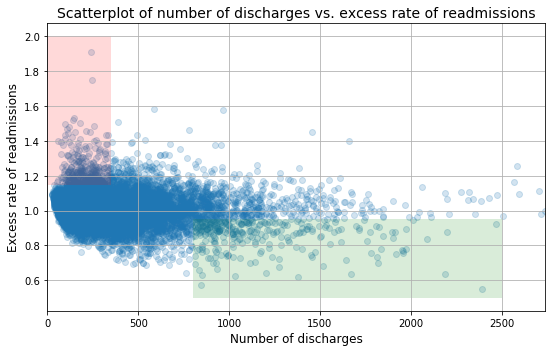

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Beginning of Response

I disagree with the initial observations. We cannot make the statement that, "the rate of readmissions is not trending down with increasing number of discharges" from the graph above. We can do a null hypothesis test to check the validity of the observation. While it is possible for Medicare to have done this analysis privately and not posted it to their webpage, we will do the check anyway to confirm.

Let's let the hypotheses be:
H0 = Excess rate of admissions is equal when the number of discharges is less than 100 and when the number of discharges is greater than 1000.
H1 = Excess rate of admissions is not equal when the number of discharges is less than 100 and when the number of discharges is greater than 1000.

Let us do a t-test to see how close the mean of the one dataset gets to the other.

In [5]:
less_than_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
less_than_100 = less_than_100[less_than_100['Number of Discharges'] > 0]
greater_than_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

import scipy.stats as stats

t = stats.ttest_ind(less_than_100['Excess Readmission Ratio'], greater_than_1000['Excess Readmission Ratio'])
t

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)

The small p-value indicates that we can reject the null hypothesis that the excess rate of readmission for less than 100 discharges and greater than 1000 discharges is the same. That leaves us with the alternative hypothesis that there is a significant difference between the two.

Let us suppose that our alpha, or significance level, was 0.01. The p-value is still smaller than 0.01. Thus, we can reject the null hypothesis and say that our result is statistically significant.

Let's do a linear regression to find what the difference is.

We can consider the highest values of excess rate of admission for the number of discharges to be outliers. Most of the values lie between 0.8 and 1.2 on the readmission scale. There are more hospitals that discharge less than a 1000 patients than there are hospitals that discharge more than 1000. 

If we look between 0.8 and 1.2 on the readmission scale we can see that most of the hospitals that discharge more than 1000 patients have values in that area. The initial observation seems to pay heavier attention to the outliers than it does towards the bulk of the observations.

The statistics portion of their prelimiary findings only details the values of less than 100 discharges and more than 1000 discharges. It fails to describe the purple portion of the graph below. This is erroneous as most of the data values lie between the discharge domain of 100 and 1000.

Note that the below graph does not include hospitals that provided their number of discharges as 0 or as NaN.

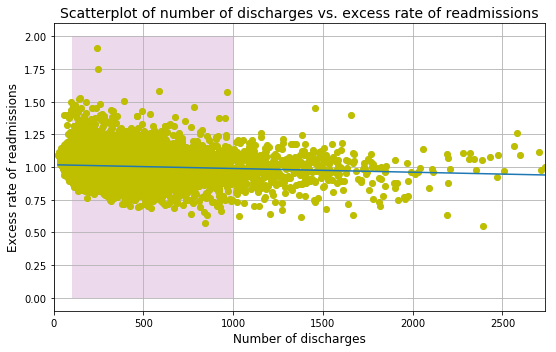

In [6]:
fig, bx = plt.subplots(figsize=(8,5))
fit = np.polyfit(x, y, deg=1)
fit_fn = np.poly1d(fit)
bx.plot(x, y, 'yo', x, fit_fn(x))
bx.scatter(x, y,alpha=0.2)

bx.fill_between([100,1000], 0, 2, facecolor='purple', alpha = .15, interpolate=True)

bx.set_xlim([0, max(x)])
bx.set_xlabel('Number of discharges', fontsize=12)
bx.set_ylabel('Excess rate of readmissions', fontsize=12)
bx.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

bx.grid(True)
fig.tight_layout()

Let's see what our slope and y-intercept are for our linear regression line.

In [7]:
fit[0], fit[1]

(-2.8565052943821946e-05, 1.0179475579544202)

Let's also see some of our cleaned dataframe.

In [9]:
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


The second diagram also lends to better ascertation that we cannot simply say that the mean excess rate of admissions trends down with an increase in the number of discharges. It is better to say that the data values fit the Central Limit Theorem. We can say from analysis of our slope and intecept values that the limit approaches -0.000028565.

We can see from the cleaned dataframe that there are several hospitals that have not provided values to determine excess rates of readmission. A reminder that these values were not included in the graph.

In [10]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [11]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [12]:
clean_hospital_read_df['Number of Discharges'].value_counts().head()

0      81
172    45
111    40
137    39
119    39
Name: Number of Discharges, dtype: int64

We can see that 5,282 hospital values were removed in the creation of the clean dataframe. 81 of the remaining hospitals did not provide discharge data. This will factor into our recommendations at the end of this exercise.

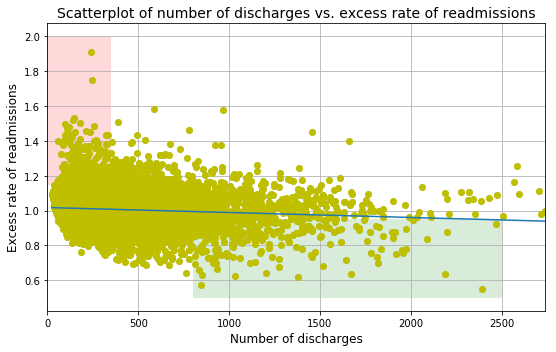

In [13]:
fig, cx = plt.subplots(figsize=(8,5))
fit = np.polyfit(x, y, deg=1)
fit_fn = np.poly1d(fit)
cx.plot(x, y, 'yo', x, fit_fn(x))
cx.scatter(x, y,alpha=0.2)

cx.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
cx.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

cx.set_xlim([0, max(x)])
cx.set_xlabel('Number of discharges', fontsize=12)
cx.set_ylabel('Excess rate of readmissions', fontsize=12)
cx.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

cx.grid(True)
fig.tight_layout()

Recall that the prelimiary observations positted that 
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

We have drawn the graph again with the red and green boxes and the linear trendline. We can see that the trendline does not enter the area of the red box at all and only touches the corner of the green box. These preliminary observations do not appear to be statistically significant.

In conclusion, we can see from our hypothesis testing and the inputted linear trendline that the excess rate of readmissions does go down as the number of discharges goes up. However the rate of change is so small (2 for every hundred thousand) that this trend should not be relied upon for the creation of hopital policies and should not be used as an excuse to simply send patients home in the hopes that they won't return. Slightly more than 5,000 hospitals provided their name to the dataframe but little else. They did not provide discharge or readmission data and so were not able to be included in our data plotting. An additional 5,000 data points would make our analysis much more accurate and it should be requested of the nation's hospitals to put forth the effort to join in and help insurance companies and private doctors determine the cause and effects of the excess rate of readmissons to hospitals.